# Lecture 13 : Testing Hypothesis

## 6.2: Module 6 Notebook 2 - The GSI's Defense

In [5]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [6]:
# read the data
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [26]:
# get the total number of students in each section
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [27]:
# obtain the average score for each section
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [9]:
observed_average = 13.6667 

In [15]:
# observed_average = scores.group('Section', np.average).where('Section', 3)[1][0]
# observed_average

13.666666666666666

In [28]:
# obtain a random sample of 27 students (same number of students in section 3)
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
2,24
1,8
2,13
1,11
11,14
5,12
4,13
3,20
5,15
11,24


In [29]:
# compute the average score of simulated midterm exam scores for section 3
np.average(random_sample.column('Midterm'))

16.888888888888889

In [30]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

# putting code from the previous 2 cells into one function

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [19]:
# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

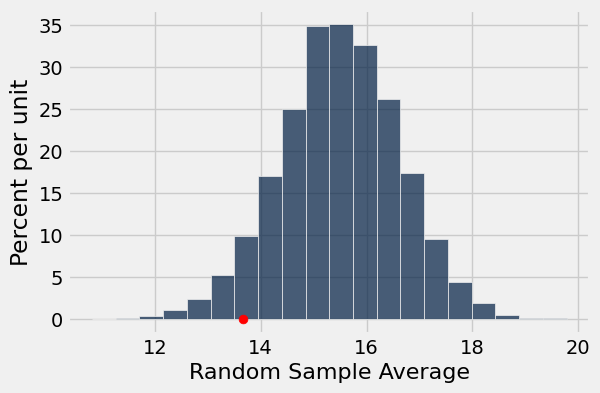

In [21]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, -0.0001, color = 'red', s=40);

## Statistical Significance (P-Value)

In [22]:
# compute the empirical p-value of the simulated value of the test statistic
sum(sample_averages <= observed_average) / 50000

0.056180000000000001

In [23]:
# 5% of 50,000 = 2500

five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

13.62962962962963

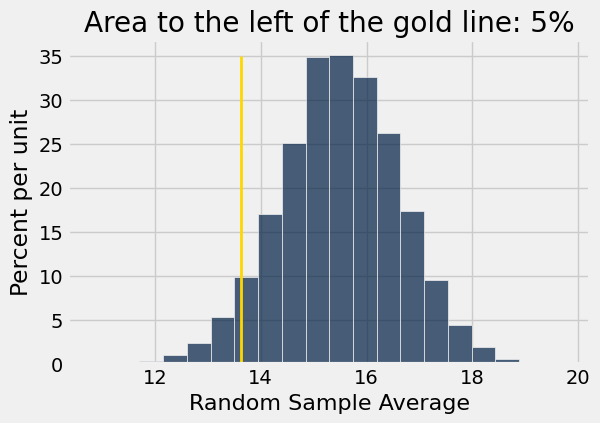

In [24]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');